In [13]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#loading the dataset of .csv file

target_data = "../../dataset/AAPL.csv"
apple_stock = pd.read_csv(target_data, parse_dates = True)
apple_stock.Date = pd.to_datetime(apple_stock.Date)
apple_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-13,110.800003,112.339996,110.800003,112.040001,108.011795,33257300
1,2016-04-14,111.620003,112.389999,111.330002,112.099998,108.069633,25473900
2,2016-04-15,112.110001,112.300003,109.730003,109.849998,105.900528,46939000
3,2016-04-18,108.889999,108.949997,106.940002,107.480003,103.615738,60834000
4,2016-04-19,107.879997,108.000000,106.230003,106.910004,103.066238,32384900


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 7 columns):
Date         505 non-null datetime64[ns]
Open         505 non-null float64
High         505 non-null float64
Low          505 non-null float64
Close        505 non-null float64
Adj Close    505 non-null float64
Volume       505 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.7 KB


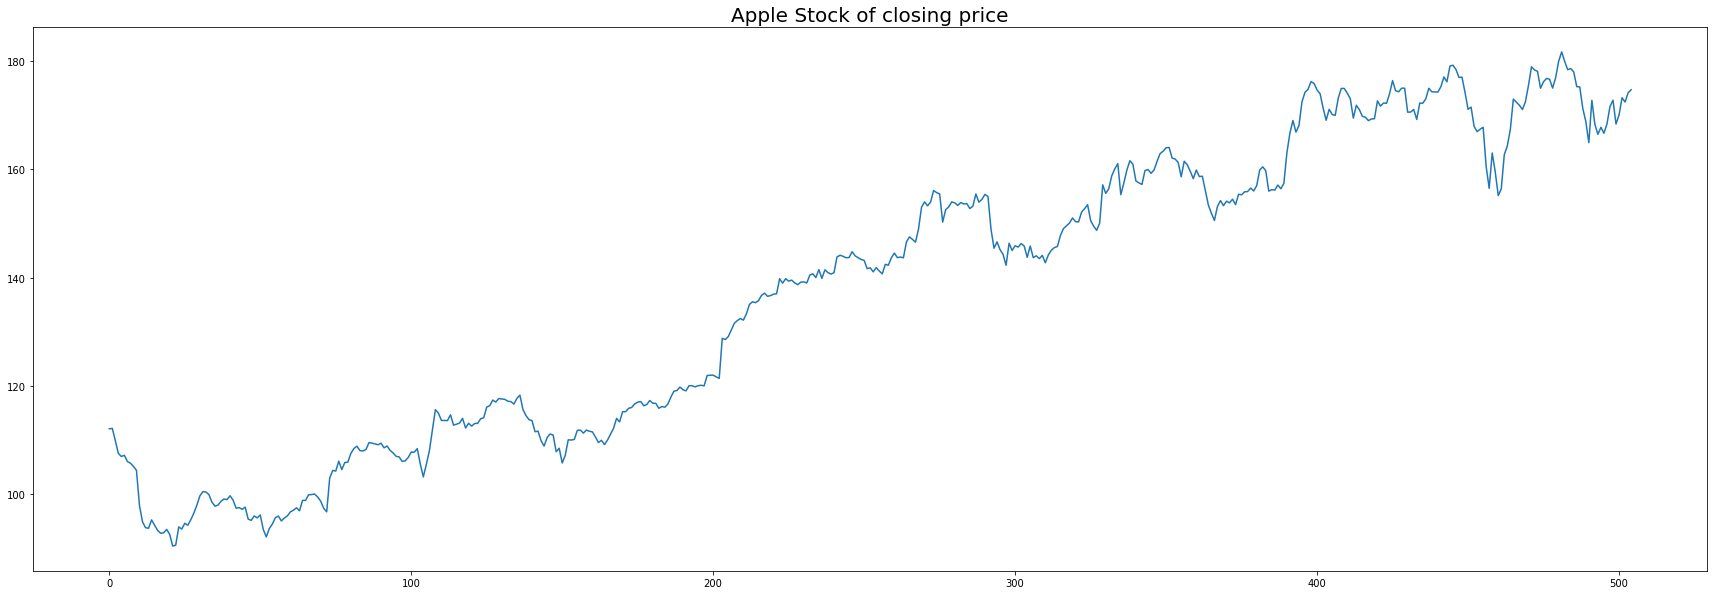

In [15]:
apple_stock.info()
plt.figure(figsize=(30,10))
plt.plot(apple_stock.index, apple_stock['Close'])
plt.title("Apple Stock of closing price", fontsize = 20)
plt.show()

In [18]:
# define the first rising sar and falling sar
#check for the trend, deside rising or falling

exam_data01 = {'Date': apple_stock['Date'],'High': apple_stock['High'], 'Low': apple_stock['Low'], 
               'Close': apple_stock['Close']}
df = pd.DataFrame(exam_data01)
rising_sar = []
falling_sar = []
# index 0 is the date, index 1 is the value
rising_sar.append([])
rising_sar.append([])
falling_sar.append([])
falling_sar.append([])

# 1 mean start with rising sar, 0 means start with falling sar
sar = []
#deside whether start with falling sar or start with rising sar
if(apple_stock['Close'][1] > apple_stock['Close'][0]):
    sar.append(1)
else:
    sar.append(0)
    
r_extreme_point = []
f_extreme_point = []
r_af = 0.02
f_af = 0.02
#final_sar = []
#go through data row by row
for index, row in apple_stock.iterrows():
    #if this is the first stock price, follow the sar we descide before
    #if not, compre the price and descide it is a falling or a rising
    if(index == 0):
        if(sar[0] == 1):
            rising_sar[0].append(row['Date'])
            rising_sar[1].append(row['Low'])
            r_extreme_point.append(row['High'])
        else:
            falling_sar[0].append(row['Date'])
            falling_sar[1].append(row['High'])
            f_extreme_point.append(row['Low'])
    else:
        #if the close price is higher than falling sar, change to rising sar
        #if the close price is lower than rising sar, change to falling sar
        #calculate both extreme point every day
        
        #prior_r_sar = rising_sar[1][len(rising_sar[1])-1]
        #prior_f_sar = falling_sar[1][len(falling_sar[1])-1]
        #prior_r_ep = r_extreme_point[len(r_extreme_point)-1]
        #prior_f_ep = f_extreme_point[len(f_extreme_point)-1]
        
        if(sar[index-1] == 1):
            if(row['Close'] < rising_sar[1][len(rising_sar[1])-1]):
                #now changing to downward trend, falling sar
                r_sar = 0.02
                try:
                    sar.append(0)
                    falling_sar[0].append(row['Date'])
                    falling_sar[1].append((falling_sar[1][len(falling_sar[1])-1] - f_af * 
                                           (falling_sar[1][len(falling_sar[1])-1] - f_extreme_point[len(f_extreme_point)-1])))
                    if(row['Low'] < f_extreme_point[len(f_extreme_point)-1]):
                        f_extreme_point.append(row['Low'])
                        if(f_af < 0.2):
                            f_af += 0.02
                except:
                    falling_sar[0].append(row['Date'])
                    falling_sar[1].append(row['High'])
                    f_extreme_point.append(row['Low'])
            else:
                # continue upward trend, rising sar
                sar.append(1)
                rising_sar[0].append(row['Date'])
                rising_sar[1].append((rising_sar[1][len(rising_sar[1])-1] + r_af * 
                                      (r_extreme_point[len(r_extreme_point)-1] - rising_sar[1][len(rising_sar[1])-1])))
                if(row['High'] > r_extreme_point[len(r_extreme_point)-1]):
                    r_extreme_point.append(row['High'])
                    if(r_af < 0.2):
                        r_af += 0.02
        else:
            if(row['Close'] > falling_sar[1][len(falling_sar[1])-1]):
                #change to upward trend
                f_sar = 0.02
                try:
                    sar.append(1)
                    rising_sar[0].append(row['Date'])
                    rising_sar[1].append((rising_sar[1][len(rising_sar[1])-1] + r_af * 
                                          (r_extreme_point[len(r_extreme_point)-1] - rising_sar[1][len(rising_sar[1])-1])))
                    if(row['High'] > r_extreme_point[len(r_extreme_point)-1]):
                        r_extreme_point.append(row['High'])
                        if(r_af < 0.2):
                            r_af += 0.02
                except:
                    rising_sar[0].append(row['Date'])
                    rising_sar[1].append(row['Low'])
                    r_extreme_point.append(row['High'])
            else:
                #continue with downward trend
                sar.append(0)
                falling_sar[0].append(row['Date'])
                falling_sar[1].append((falling_sar[1][len(falling_sar[1])-1] - f_af * 
                                       (falling_sar[1][len(falling_sar[1])-1] - f_extreme_point[len(f_extreme_point)-1])))
                if(row['Low'] < f_extreme_point[len(f_extreme_point)-1]):
                    f_extreme_point.append(row['Low'])
                    if(f_af < 0.2):
                        f_af += 0.02
                        

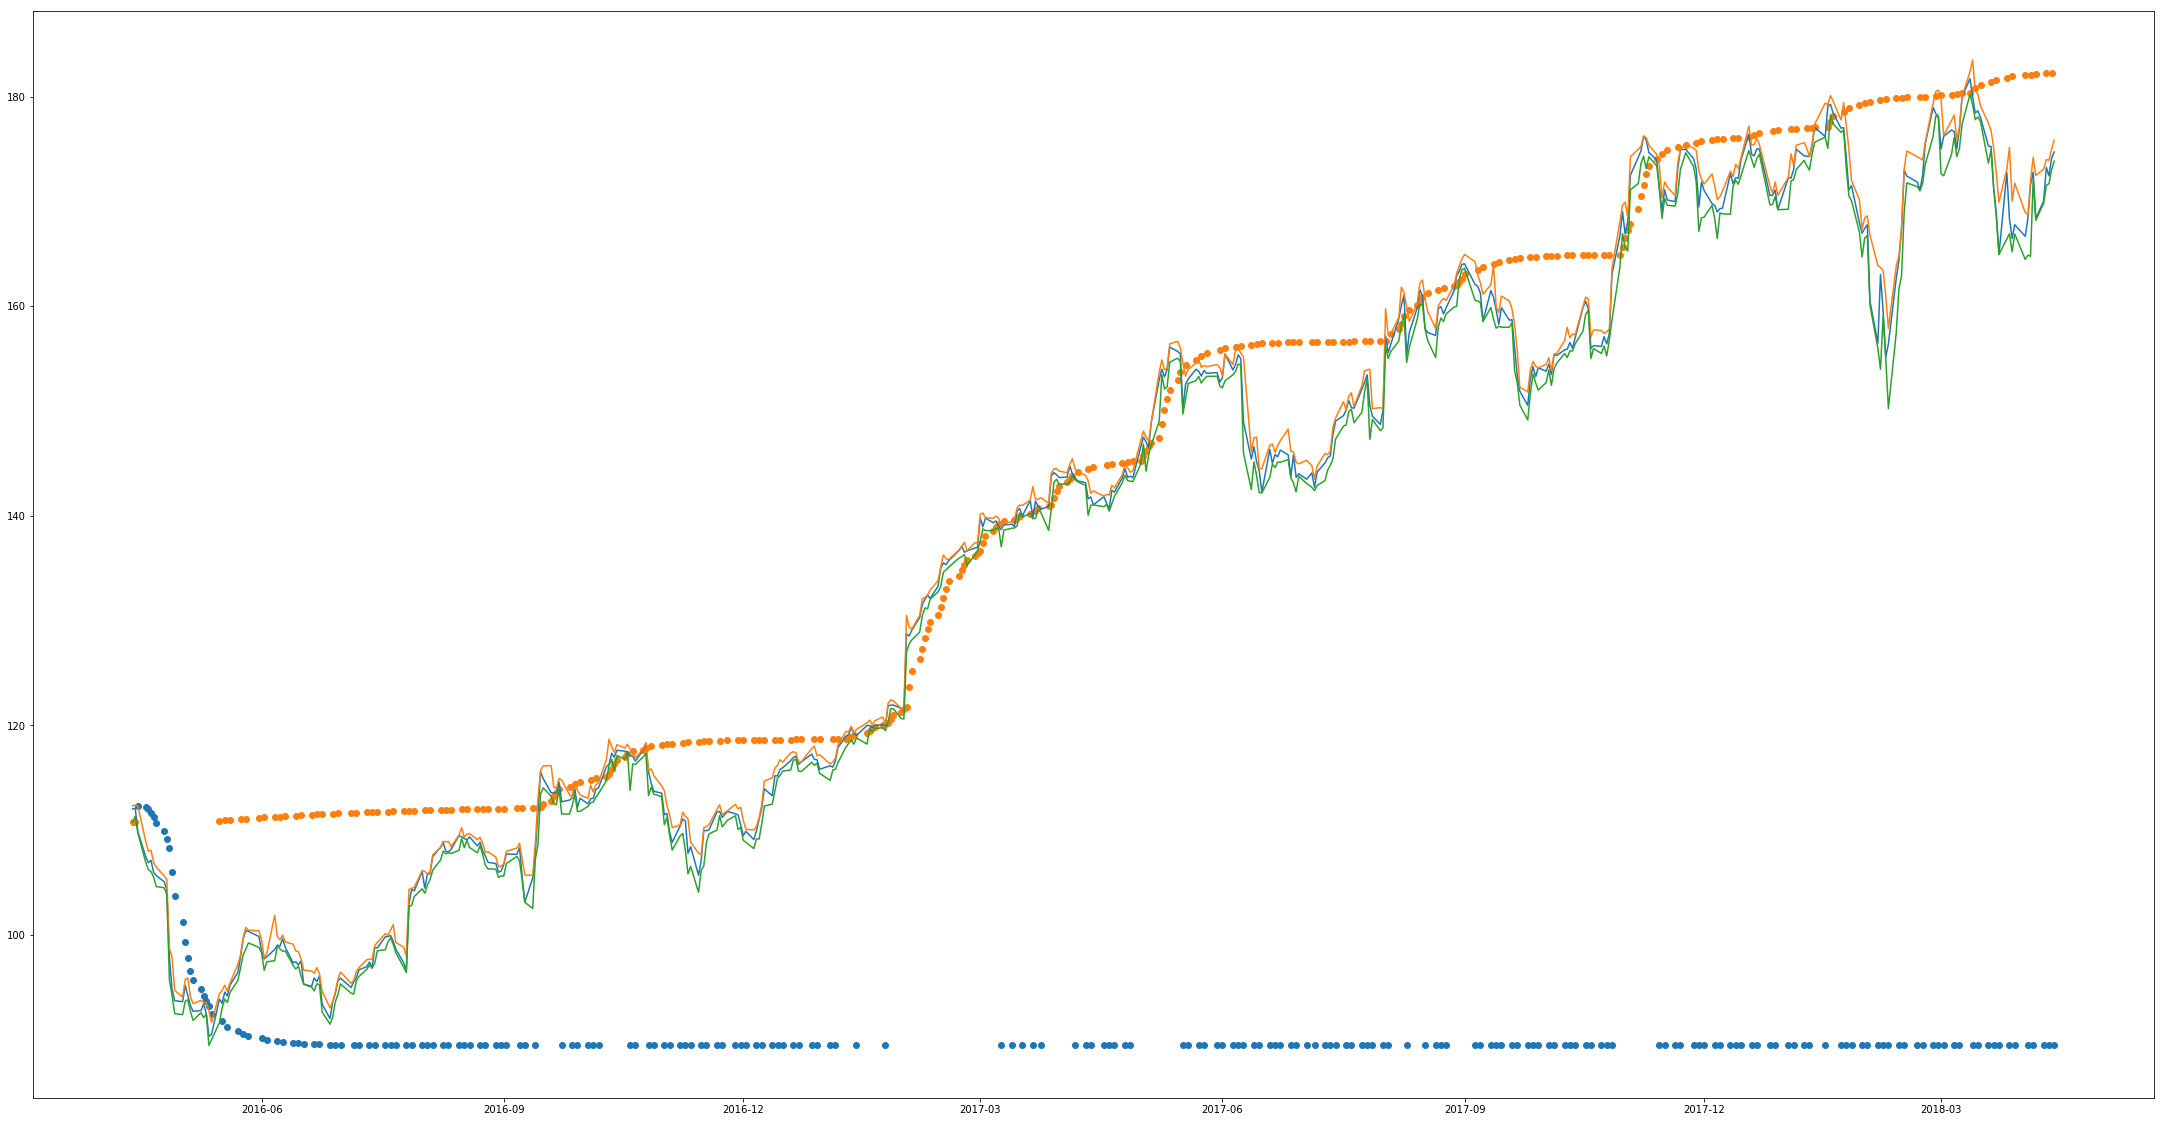

In [19]:
fig, ax = plt.subplots(1,1, figsize=(38,20))
x = df.Date
y = df['Close']
plt.plot(x, y, alpha=1)
plt.plot(x, apple_stock['High'], alpha=1)
plt.plot(x, apple_stock['Low'], alpha=1)
falling_sar[0].pop(0)
#print falling_sar[1]
plt.scatter(falling_sar[0], falling_sar[1], alpha=1)
plt.scatter(rising_sar[0], rising_sar[1], alpha=1)
plt.show()

In [95]:
#calculate the raising SAR
exam_data01 = {'Date': apple_stock['Date'],'High': apple_stock['High'], 'Low': apple_stock['Low'], 'Close': apple_stock['Close']}

df = pd.DataFrame(exam_data01)

##set up the new array 
Rextreme_point = []
acceleration_factor =[]
Rsar = []
## rows can be anything
for index, rows in apple_stock.iterrows():
    
    if (index == 0):
        Rextreme_point.append(rows['High'])
        acceleration_factor.append(0.02)
        Rsar.append(rows['Low'])

    else:
        if(rows['High'] > Rextreme_point[index-1]):
            Rextreme_point.append(rows['High'])
            
            if(acceleration_factor[index-1] <= 0.18):
                acceleration_factor.append(acceleration_factor[index-1] + 0.02)
            else:
                acceleration_factor.append(acceleration_factor[index-1])
        else:
            Rextreme_point.append(Rextreme_point[index-1])
            acceleration_factor.append(acceleration_factor[index - 1])
        Rsar.append(Rsar[index - 1] + acceleration_factor[index - 1]*(Rextreme_point[index - 1] - Rsar[index - 1]))
df['Rising Extreme Point'] = Rextreme_point

df['Rising Acceleration Factor'] = acceleration_factor

df['Rising SAR'] = Rsar
print df

          Close       Date        High         Low  Rising Extreme Point  \
0    112.040001 2016-04-13  112.339996  110.800003            112.339996   
1    112.099998 2016-04-14  112.389999  111.330002            112.389999   
2    109.849998 2016-04-15  112.300003  109.730003            112.389999   
3    107.480003 2016-04-18  108.949997  106.940002            112.389999   
4    106.910004 2016-04-19  108.000000  106.230003            112.389999   
5    107.129997 2016-04-20  108.089996  106.059998            112.389999   
6    105.970001 2016-04-21  106.930000  105.519997            112.389999   
7    105.680000 2016-04-22  106.480003  104.620003            112.389999   
8    105.080002 2016-04-25  105.650002  104.510002            112.389999   
9    104.349998 2016-04-26  105.300003  103.910004            112.389999   
10    97.820000 2016-04-27   98.709999   95.680000            112.389999   
11    94.830002 2016-04-28   97.879997   94.250000            112.389999   
12    93.739

In [96]:
#calculate the failing SAR


Fextreme_point = []
acceleration_factor =[]
Fsar = []
## rows can be anything
for index, rows in apple_stock.iterrows():
    
    if (index == 0):
        Fextreme_point.append(rows['Low'])
        acceleration_factor.append(0.02)
        Fsar.append(rows['High'])

    else:
        if(rows['Low'] < Fextreme_point[index-1]):
            Fextreme_point.append(rows['Low'])
            
            if(acceleration_factor[index-1] <= 0.18):
                acceleration_factor.append(acceleration_factor[index-1] + 0.02)
            else:
                acceleration_factor.append(acceleration_factor[index-1])
        else:
            Fextreme_point.append(Fextreme_point[index-1])
            acceleration_factor.append(acceleration_factor[index - 1])
        Fsar.append(Fsar[index - 1] + acceleration_factor[index - 1]*(Fextreme_point[index - 1] - Fsar[index - 1]))
        
        
        
df['Falling Extreme Point'] = Fextreme_point

df['Falling Acceleration Factor'] = acceleration_factor

df['Falling SAR'] = Fsar
print df.head()

        Close       Date        High         Low  Rising Extreme Point  \
0  112.040001 2016-04-13  112.339996  110.800003            112.339996   
1  112.099998 2016-04-14  112.389999  111.330002            112.389999   
2  109.849998 2016-04-15  112.300003  109.730003            112.389999   
3  107.480003 2016-04-18  108.949997  106.940002            112.389999   
4  106.910004 2016-04-19  108.000000  106.230003            112.389999   

   Rising Acceleration Factor  Rising SAR  Falling Extreme Point  \
0                        0.02  110.800003             110.800003   
1                        0.04  110.830803             110.800003   
2                        0.04  110.893171             109.730003   
3                        0.04  110.953044             106.940002   
4                        0.04  111.010522             106.230003   

   Falling Acceleration Factor  Falling SAR  
0                         0.02   112.339996  
1                         0.02   112.309196  
2       

In [97]:
#check the upward and downward trend
datapoint = []

for index, rows in apple_stock.iterrows():
    if(index == 0):
        datapoint.append(rows['High'])
    else:
        if(Rsar[index]>Fsar[index]):
            datapoint.append(Rsar[index])
        else:
            datapoint.append(Fsar[index])
            
df['datapoint'] = datapoint

print df['datapoint']

0      112.339996
1      112.309196
2      112.279012
3      112.177052
4      111.862829
5      111.412203
6      111.118673
7      111.169526
8      111.218345
9      111.265211
10     111.310203
11     111.353395
12     111.394859
13     111.434664
14     111.472878
15     111.509563
16     111.544780
17     111.578589
18     111.611045
19     111.642203
20     111.672115
21     111.700831
22     111.728397
23     111.754861
24     111.780267
25     111.804656
26     111.828070
27     111.850547
28     111.872125
29     111.892840
          ...    
475    180.333238
476    180.390590
477    180.436471
478    180.473176
479    180.502539
480    180.526031
481    180.544823
482    180.913859
483    181.431087
484    181.844869
485    182.175896
486    182.440716
487    182.652573
488    182.822059
489    182.957647
490    183.066117
491    183.152894
492    183.222315
493    183.277852
494    183.322282
495    183.357825
496    183.386260
497    183.409008
498    183.427207
499    183

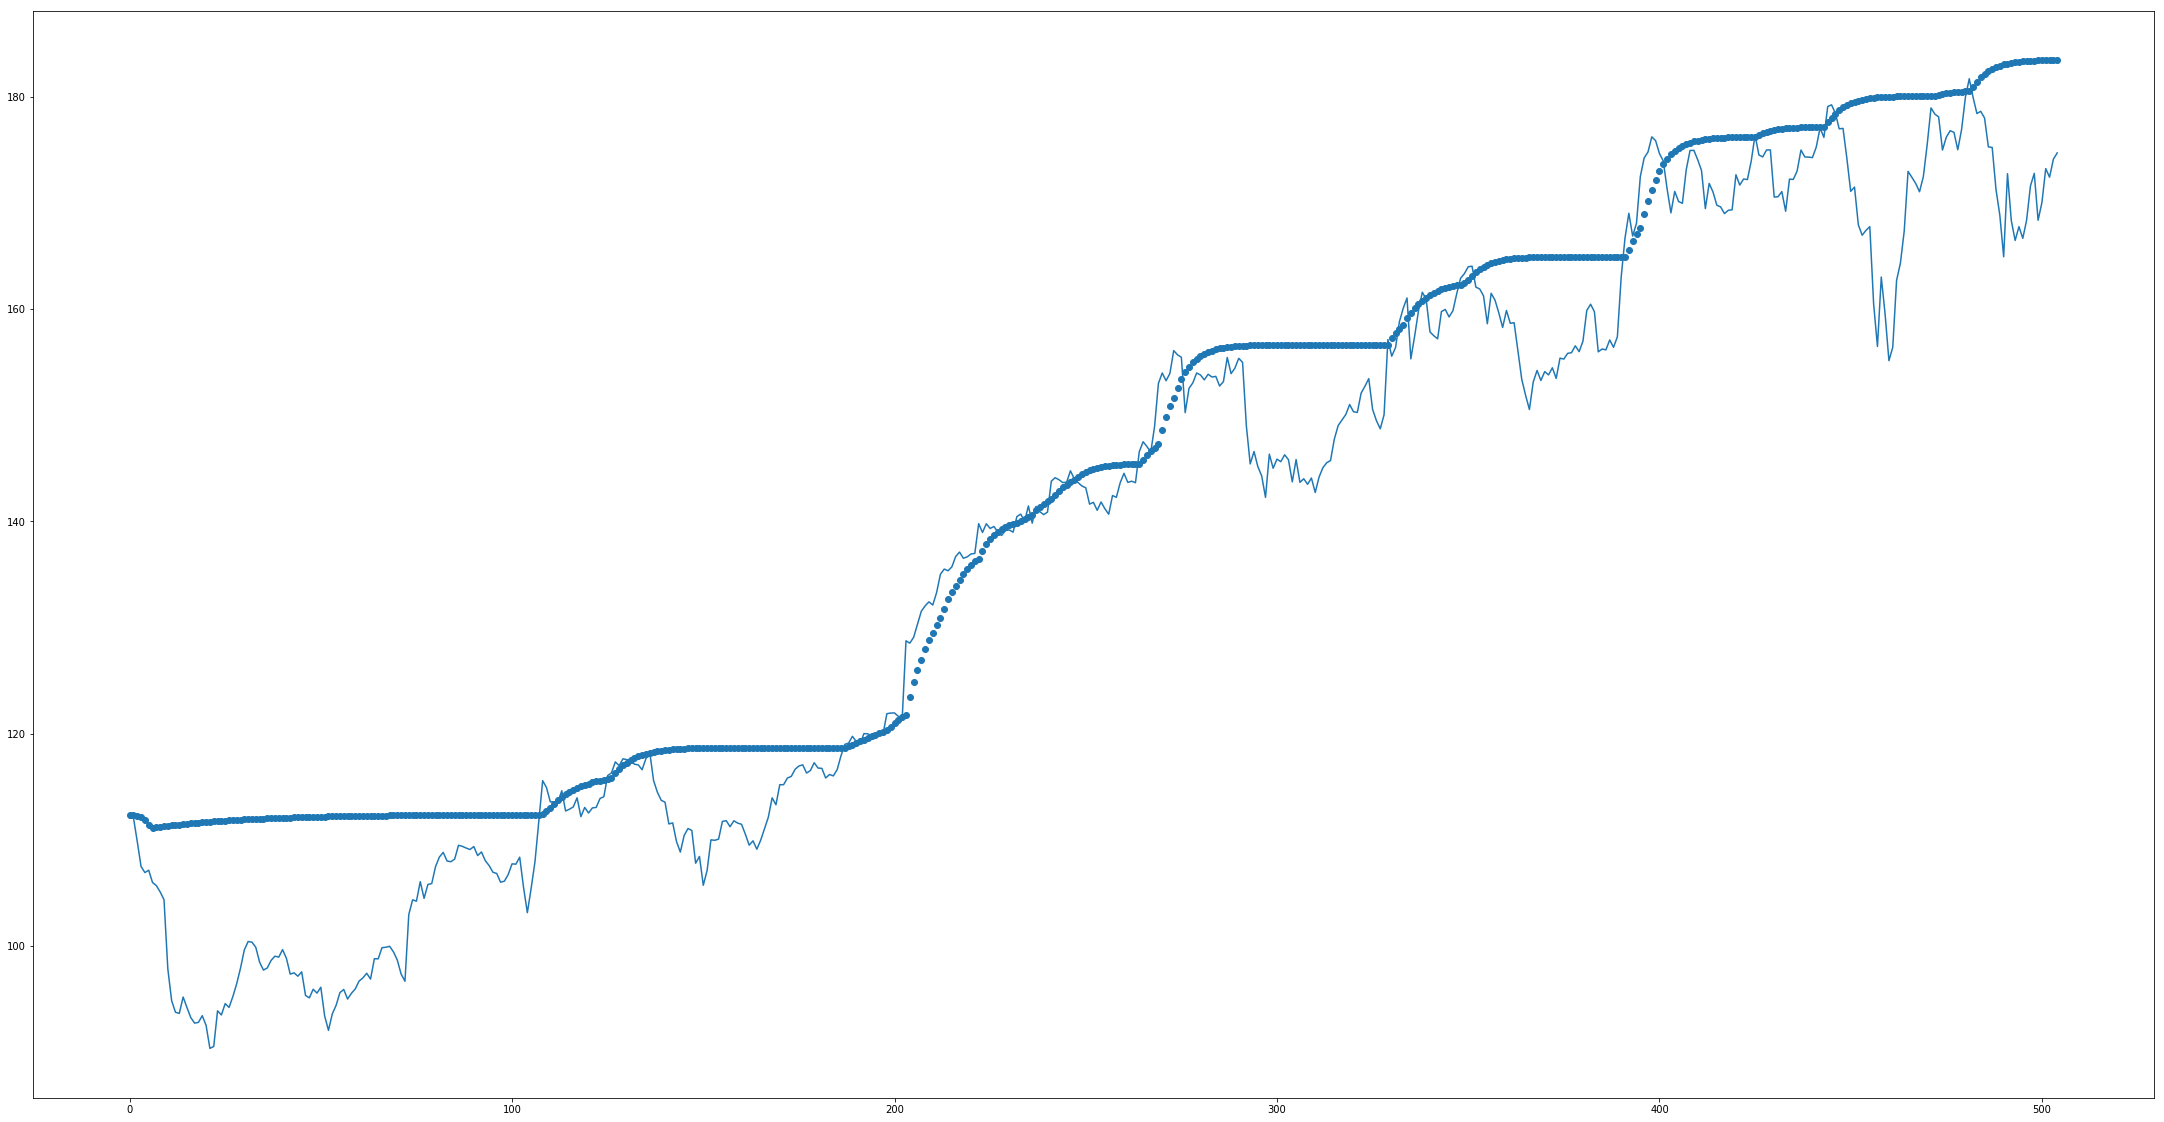

In [34]:
#do the scatter plot of rising and failing SAR
fig, ax = plt.subplots(1,1, figsize=(38,20))
x = df.index
y = df['Close']
plt.scatter(x, datapoint, alpha=1)
plt.plot(x, y, alpha=1)

plt.show()
